In [30]:
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.morphology import remove_small_objects
import numpy as np

In [31]:
from imagemks.filters.fftedges import local_avg
from imagemks.filters.morphological import smooth_binary

In [32]:
image = io.imread('./images/20um_VH_2.tif')

In [33]:
gray_image = rgb2gray(image)
gray_image[-90:,-180:] = gray_image[-90:,:180]
gray_image = (gray_image-np.amin(gray_image)) / np.ptp(gray_image)

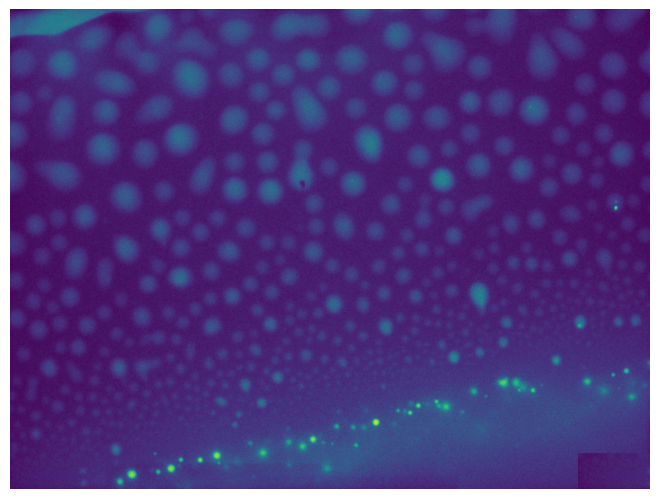

In [34]:
import matplotlib.pyplot as plt

plt.imshow(gray_image)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

In [35]:
def segmentation(image, sigma, intensity_exp, min_th, max_th, radius_smooth, perc_neigh_smooth,min_size):


    blurred_image = gaussian(image, sigma=sigma)


    pow_image = ( blurred_image-np.amin(blurred_image)) / np.ptp(blurred_image)
    pow_image = np.power(pow_image, intensity_exp)

    th_short = pow_image > local_avg(pow_image, min_th)
    th_long = pow_image > local_avg(pow_image, max_th)   

    th_N = (th_short*th_long) 

    th_N = smooth_binary(th_N, r=radius_smooth, add_cond=perc_neigh_smooth)

    cleaned_segmentation = remove_small_objects(th_N, min_size=min_size)

    return cleaned_segmentation


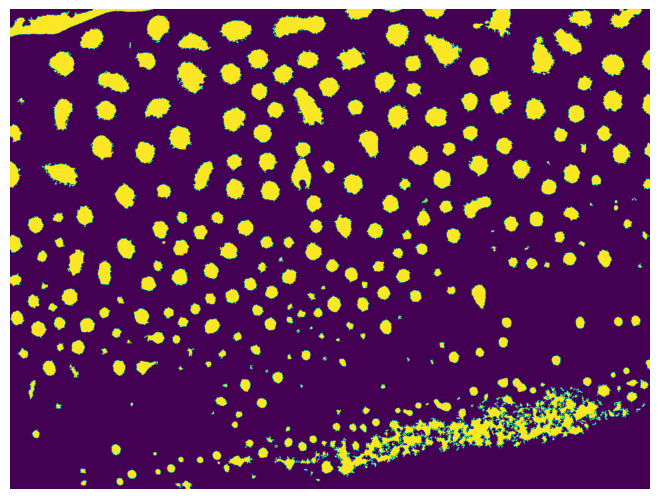

In [36]:
import matplotlib.pyplot as plt

plt.imshow(segmentation(gray_image, 1, 3, 25, 300, 6, 0.5, 25))
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)